**The Spark Foundation - GRIP - Data Science & Business Analytics**

Task-3 - Exploratory Data Analysis-Retail  - Thriguna

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded=files.upload()

Saving SampleSuperstore.csv to SampleSuperstore.csv


In [3]:
data=pd.read_csv('SampleSuperstore.csv')

In [4]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
data.shape

(9994, 13)

In [6]:
data['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [7]:
data['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [8]:
data.drop('Postal Code',axis=1,inplace=True)

In [ ]:
data.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.1+ KB


In [10]:
data.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


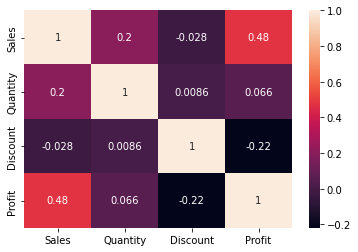

In [11]:
sns.heatmap(data.corr(),annot=True)

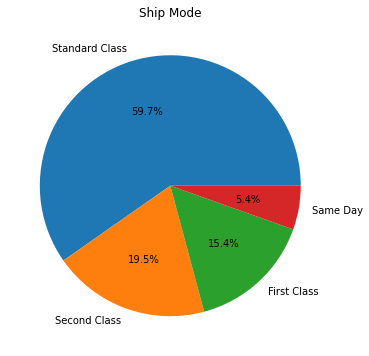

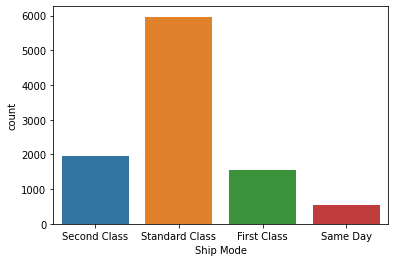

In [12]:
plt.figure(figsize=(6,6))
plt.title('Ship Mode')
plt.pie(data['Ship Mode'].value_counts(),labels=data['Ship Mode'].value_counts().index, autopct='%1.1f%%')
plt.show()
sns.countplot(x=data['Ship Mode'])

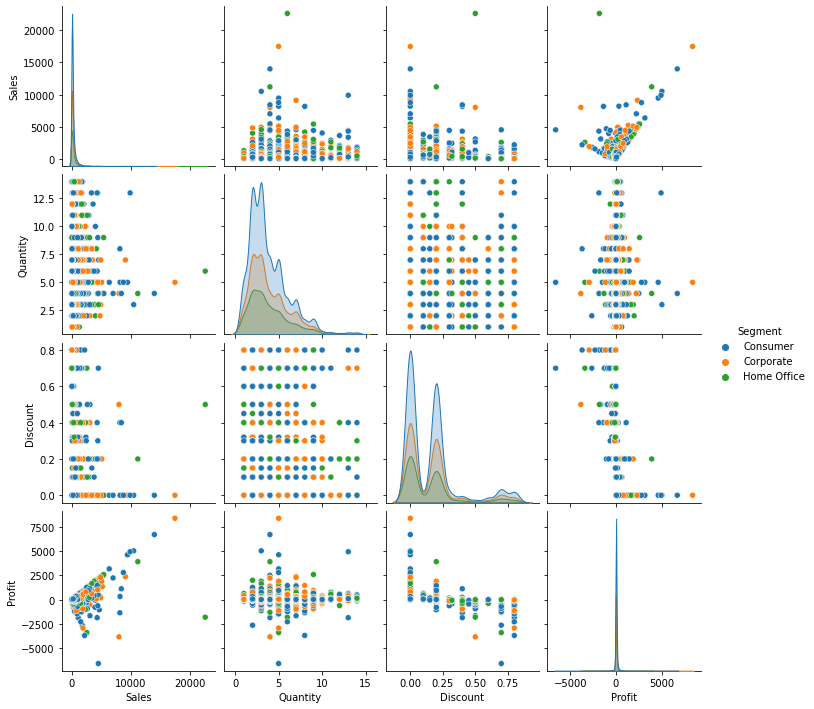

In [13]:
sns.pairplot(data=data,hue='Segment')

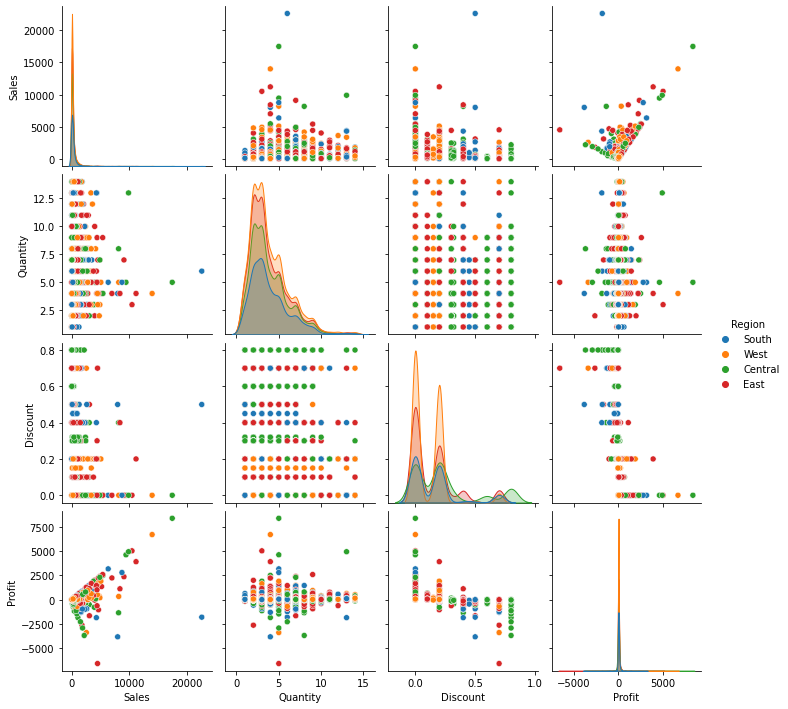

In [14]:
sns.pairplot(data=data,hue='Region')

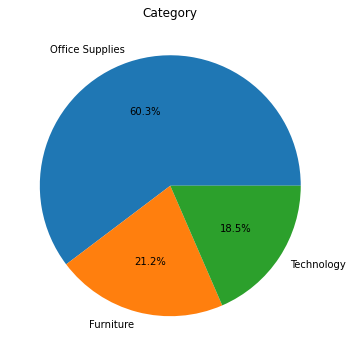

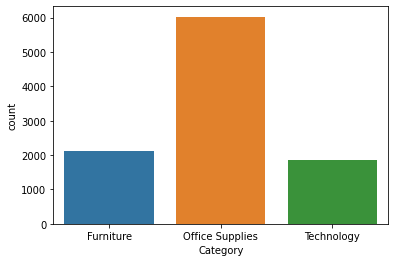

In [15]:
plt.figure(figsize=(6,6))
plt.title('Category')
plt.pie(data['Category'].value_counts(),labels=data['Category'].value_counts().index, autopct='%1.1f%%')
plt.show()
sns.countplot(x=data['Category'])

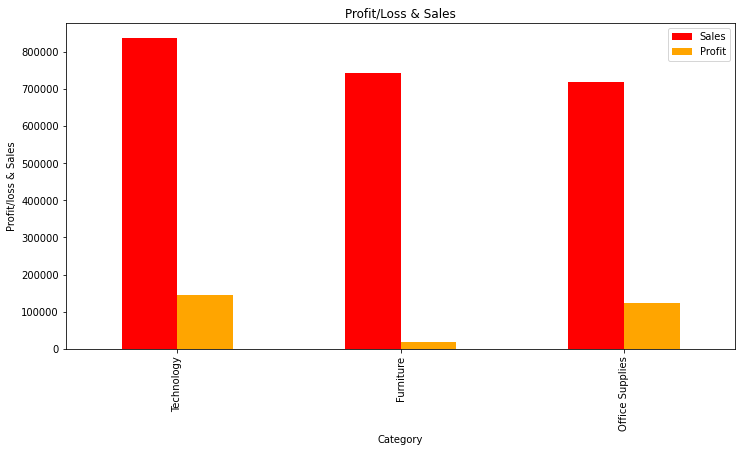

In [17]:
s=data.groupby('Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
s[:].plot.bar(color=['red','orange'],figsize=(12,6))
plt.title("Profit/Loss & Sales")
plt.xlabel('Category')
plt.ylabel('Profit/loss & Sales')
plt.show()

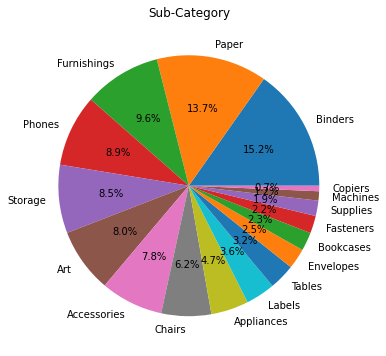

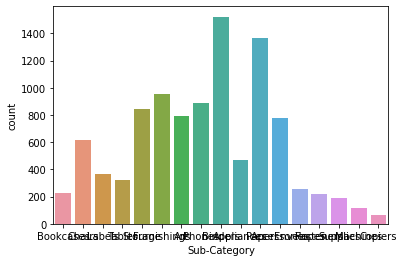

In [ ]:
plt.figure(figsize=(6,6))
plt.title('Sub-Category')
plt.pie(data['Sub-Category'].value_counts(),labels=data['Sub-Category'].value_counts().index, autopct='%1.1f%%')
plt.show()
sns.countplot(x=data['Sub-Category'])

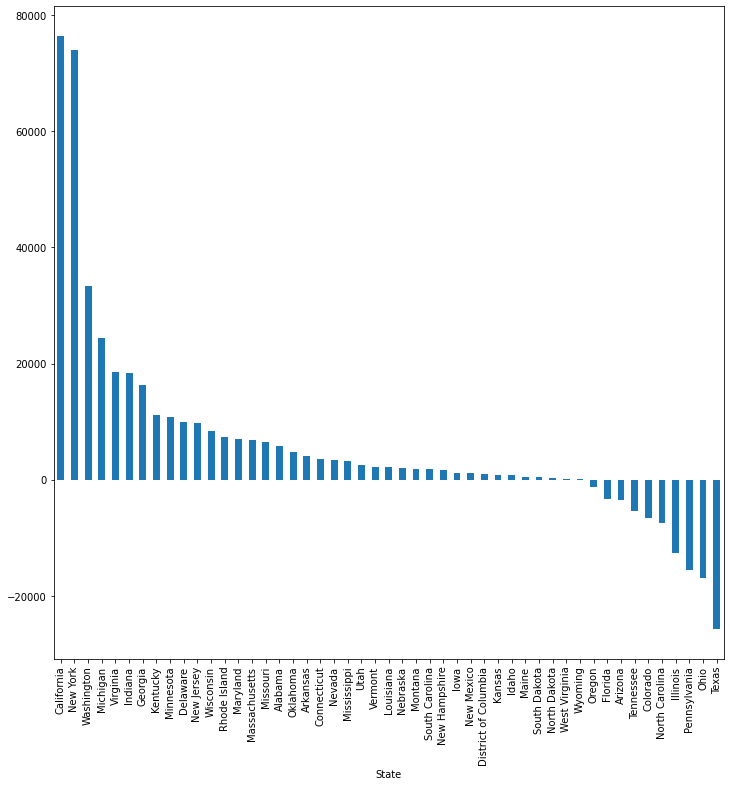

In [ ]:
plt.figure(figsize=(12,12))
plot=data.groupby(['State'])['Profit'].sum().nlargest(50)  # shows highest and lowest profit according to states
plot.plot.bar()

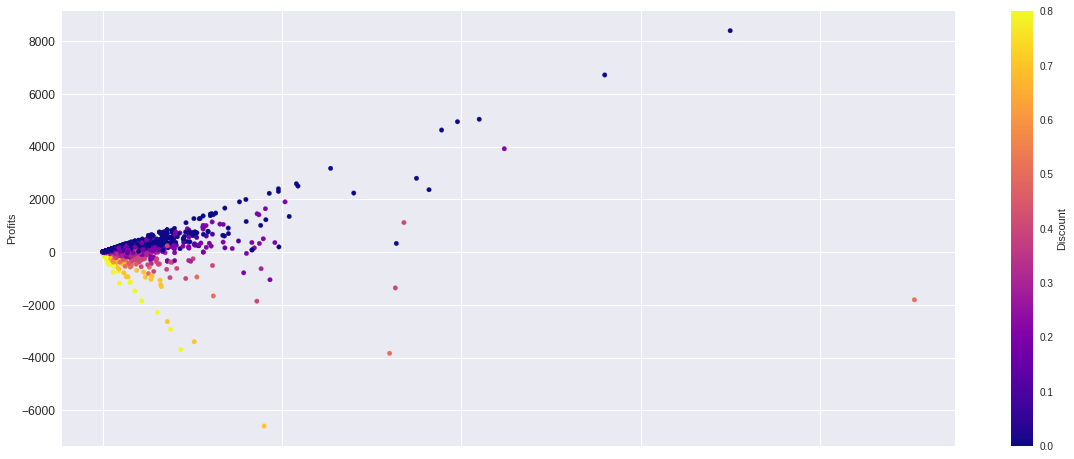

In [ ]:
plt.style.use('seaborn')
data.plot(kind='scatter',figsize=(20,8),x='Sales',y='Profit',c='Discount',s=20,fontsize=12,colormap='plasma')
plt.ylabel('Profits')
plt.xlabel('Sales')
plt.show()

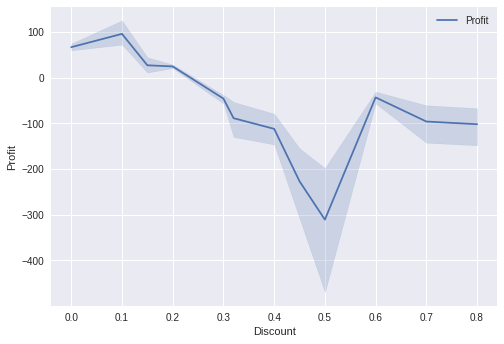

In [ ]:
sns.lineplot(x='Discount',y='Profit',label='Profit',data=data)
plt.legend()
plt.show()

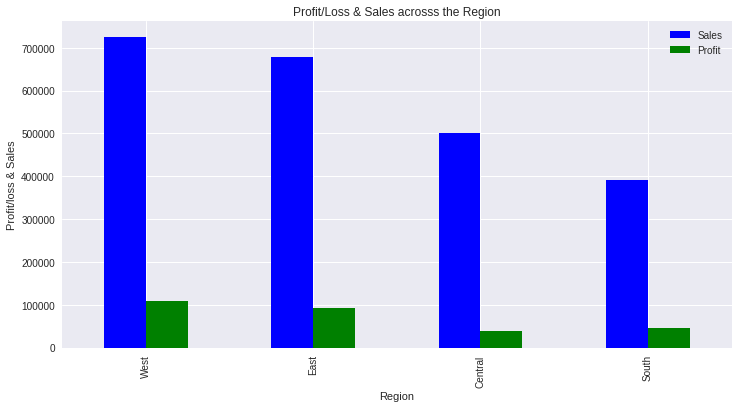

In [ ]:
a=data.groupby('Region')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
a[:].plot.bar(color=['blue','green'],figsize=(12,6))
plt.title("Profit/Loss & Sales acrosss the Region")
plt.xlabel('Region')
plt.ylabel('Profit/loss & Sales')
plt.show()

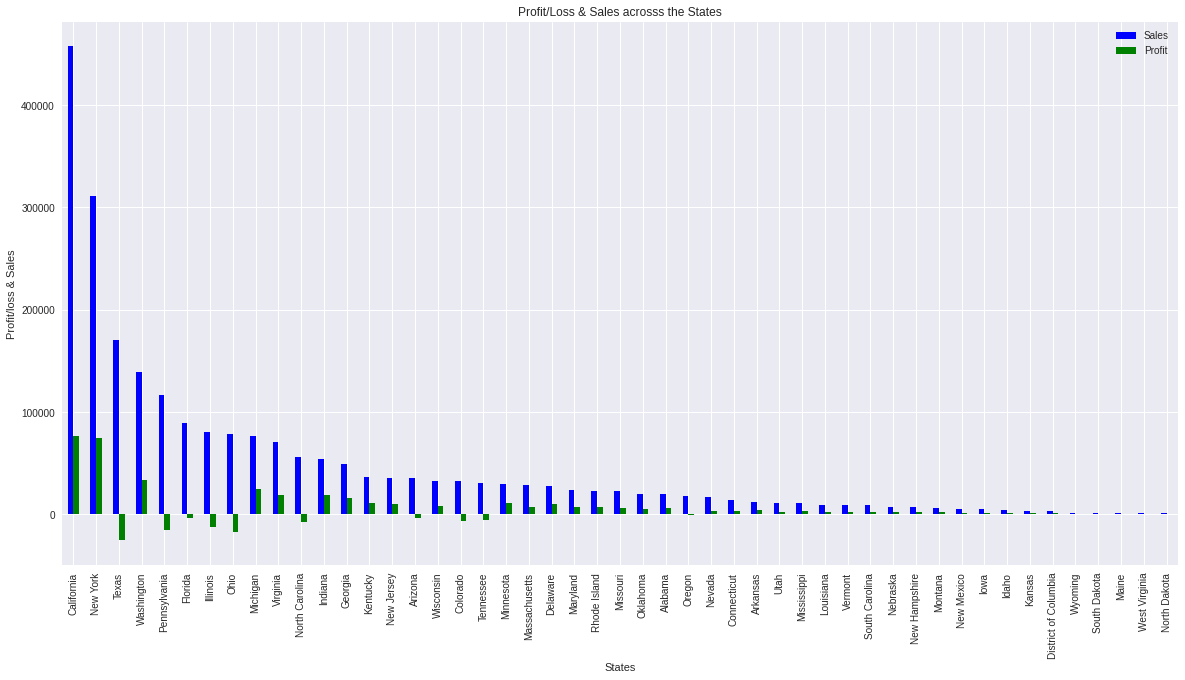

In [ ]:
a=data.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
a[:].plot.bar(color=['blue','green'],figsize=(20,10))
plt.title("Profit/Loss & Sales acrosss the States")
plt.xlabel('States')
plt.ylabel('Profit/loss & Sales')
plt.show()

**Conclusion:**
1. Focus more on California and New York, which have the highest sales potential.
2. To boost sales, reduce discounts in the Southern Region.
3.Reduce furniture sales since they generate relatively little profit relative to their sales.
4. The earnings from the office supplies category is higher, but there are less sales of office supplies, so we need to work on boosting those sales.

